# TensorFlow and Keras

In [4]:
#Uncomment and use it
#!pip install tensorflow

In [8]:
!pip show tensorflow

Name: tensorflow
Version: 2.11.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/shankar/.pyenv/versions/3.8-dev/lib/python3.8/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [9]:
import tensorflow as tf
%matplotlib inline  

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [30]:
a = tf.constant([50,10])
print(a)
b = tf.constant([[1,2,3],[3,4,7]])
print(b)
print(tf.__version__)
print(b.numpy())
print(b.shape)

tf.Tensor([50 10], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [3 4 7]], shape=(2, 3), dtype=int32)
2.11.1
[[1 2 3]
 [3 4 7]]
(2, 3)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [19]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [20]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[5.527405  4.7836804]
 [3.4078662 3.9296103]
 [5.608993  4.038655 ]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [ ]:
x = tf.Variable(5) # Simple variable
print(x)

In [31]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.8404092, -1.2949399],
       [ 0.5561162, -0.8268858]], dtype=float32)>


In [32]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

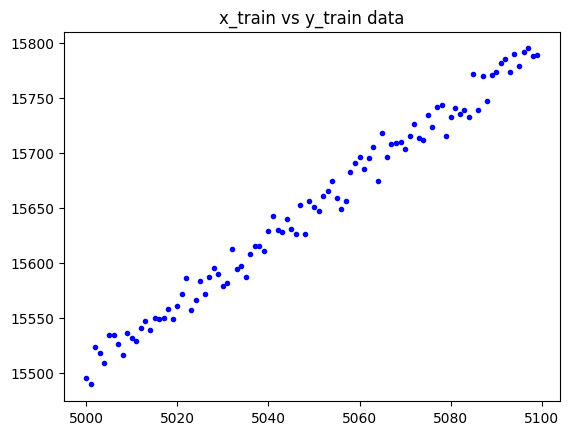

In [47]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)
noise=np.random.normal(500, 10, 100)
y_train=[3*x+noise[x-5000] for x in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [53]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  128892496.0,  W : [[0.9653369]], b  [1.0000226]
epoch : 1, loss  116081568.0,  W : [[1.0741464]], b  [1.0000442]
epoch : 2, loss  104543952.0,  W : [[1.177407]], b  [1.0000647]
epoch : 3, loss  94153072.0,  W : [[1.2754017]], b  [1.0000842]
epoch : 4, loss  84794976.0,  W : [[1.368399]], b  [1.0001025]
epoch : 5, loss  76367008.0,  W : [[1.4566537]], b  [1.00012]
epoch : 6, loss  68776712.0,  W : [[1.5404078]], b  [1.0001366]
epoch : 7, loss  61940828.0,  W : [[1.6198907]], b  [1.0001523]
epoch : 8, loss  55784392.0,  W : [[1.6953202]], b  [1.0001673]
epoch : 9, loss  50239852.0,  W : [[1.7669032]], b  [1.0001814]
epoch : 10, loss  45246404.0,  W : [[1.8348355]], b  [1.0001949]
epoch : 11, loss  40749256.0,  W : [[1.8993036]], b  [1.0002077]
epoch : 12, loss  36699100.0,  W : [[1.960484]], b  [1.0002198]
epoch : 13, loss  33051494.0,  W : [[2.0185444]], b  [1.0002313]
epoch : 14, loss  29766438.0,  W : [[2.073644]], b  [1.0002422]
epoch : 15, loss  26807896.0,  W : [[2

epoch : 167, loss  123.80029296875,  W : [[3.0986598]], b  [1.000444]
epoch : 168, loss  123.4708480834961,  W : [[3.0986772]], b  [1.000444]
epoch : 169, loss  123.1771469116211,  W : [[3.0986936]], b  [1.000444]
epoch : 170, loss  122.91143798828125,  W : [[3.0987093]], b  [1.000444]
epoch : 171, loss  122.67230224609375,  W : [[3.0987241]], b  [1.000444]
epoch : 172, loss  122.4588394165039,  W : [[3.0987382]], b  [1.000444]
epoch : 173, loss  122.26547241210938,  W : [[3.0987515]], b  [1.000444]
epoch : 174, loss  122.0922622680664,  W : [[3.0987642]], b  [1.000444]
epoch : 175, loss  121.93470764160156,  W : [[3.0987763]], b  [1.000444]
epoch : 176, loss  121.79179382324219,  W : [[3.0987878]], b  [1.000444]
epoch : 177, loss  121.66484069824219,  W : [[3.0987985]], b  [1.000444]
epoch : 178, loss  121.55154418945312,  W : [[3.0988088]], b  [1.000444]
epoch : 179, loss  121.44792175292969,  W : [[3.0988185]], b  [1.000444]
epoch : 180, loss  121.35638427734375,  W : [[3.0988278]],

Final Weights

In [ ]:
print('w ', W)
print('b ', b)

Plotting

In [ ]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

In [ ]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

In [ ]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

Plotting

In [ ]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

In [ ]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [ ]:
model = keras.Sequential()
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(20, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

In [ ]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

In [ ]:
print(model.get_weights())

In [ ]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))